In [1]:
from matplotlib.pyplot import * 
from numpy import *
import nested_res_V4p1 as nr
import glob
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline
#%matplotlib widget

linestyle = {"markeredgewidth":2, "elinewidth":2, "capsize":4,"markersize":3}


###########################################################
#                                                         #
#         WELCOME TO NESTED_FIT RESULT ANALYSIS           #
#                                                         #
#                                                         #
# Start with                                              #
# 'an=nested_res_V4p0.Analysis()'                         #
# By default the current path is considered.              #
#                                                         #
# If you want analyze another path:                       #
# 'an=nested_res_V4p0.Analysis(path="path")'              #
#                                                         #
# If you do not want to specify any path:                 #
# 'an=nested_res.Analysis(path=None)'                     #
#                                                         #
# To reload the data in the present directory:            #
# 'an.load_data()'                     

In [2]:
pxl_to_eV = 0.0380

## Profile study He-like low accuracy 90%

In [400]:
summary = nr.Summary()
an = nr.Analysis(None)

Current path =  None
Please indicate a path if needed


In [401]:
directories = ['work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_GAUSS_LA',
               'work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_SUPERGAUSS_LA',
              'work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA',
              'work_analysis_2021_06_V2/90/old_ERFPEAKs/res_He-like_GE_90_1024x1026_ERFPEAK_LA',
              'work_analysis_2021_06_V2/90/old_ERFPEAKs/res_He-like_GE_90_1024x1026_ERFPEAK_bound_LA']
labels = ['GAUSS','SUPERGAUSS','ERFPEAK','ERFPEAK old','ERFPEAK old with bounds']

In [402]:
df = summary.add_simulations(directories,labels)
df['binning']=2

Loading directory  work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_GAUSS_LA
Current path =  work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_GAUSS_LA/
Available parameters : ['weight', 'lnlikelihood', 'a', 'b', 'c', 'y0', 'Dy', 'amp', 'sigma', 'bg']
Analysis in work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_GAUSS_LA/
Loading directory  work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_SUPERGAUSS_LA
Current path =  work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_SUPERGAUSS_LA/
Available parameters : ['weight', 'lnlikelihood', 'a', 'b', 'c', 'y0', 'Dy', 'amp', 'sigma', 'bg']
Analysis in work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_SUPERGAUSS_LA/
Loading directory  work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA
Current path =  work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA/
Available parameters : ['weight', 'lnlikelihood', 'a', 'b', 'c', 'y0', 'Dy', 'amp', 'sigma', 'w', 'bg']
Analysis in work_analysis

In [403]:
df['a in eV'] = df['mean_a']*pxl_to_eV*df['binning']
df['err a in eV'] = df['sd_a']*pxl_to_eV*df['binning']

In [404]:
df[['evidence','evidence_err_est','nlive','mean_a','sd_a','mean_amp','mean_sigma','sd_sigma','mean_w','a in eV','err a in eV']]

,evidence,evidence_err_est,nlive,mean_a,sd_a,mean_amp,mean_sigma,sd_sigma,mean_w,a in eV,err a in eV
labels,,,,,,,,,,,
GAUSS,-15618.479088,0.297563,500,361.988902,0.442316,1486.565950,15.699802,0.393001,NaN,27.511157,0.033616
SUPERGAUSS,-15627.123107,0.298717,500,362.034184,0.438934,1442.042339,17.604990,0.378102,NaN,27.514598,0.033359
ERFPEAK,-15625.705859,0.327304,500,361.893950,0.473672,1475.640444,9.981033,1.234288,19.579495,27.503940,0.035999
ERFPEAK old,-15619.551170,0.306809,500,361.908756,0.498812,1460.008817,15.197851,1.254358,18.882286,27.505065,0.037910
ERFPEAK old with bounds,-15635.567102,0.342730,500,362.253671,0.429525,1423.895315,9.652627,0.327134,22.013123,27.531279,0.032644


Text(0, 0.5, 'Position (eV)')

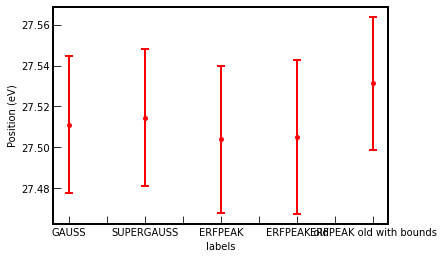

In [405]:
df['a in eV'].plot(yerr=df['err a in eV'],fmt='or',linestyle= 'None',**linestyle)
ylabel('Position (eV)')

Text(0, 0.5, 'Evidence (in log)')

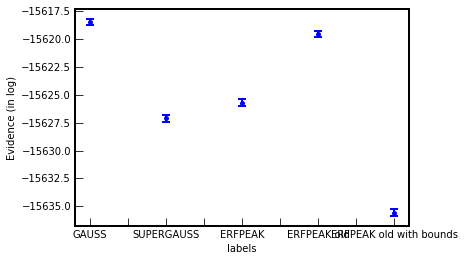

In [406]:
df['evidence'].plot(yerr=df['evidence_err_est'],fmt='ob',linestyle= 'None',**linestyle)
ylabel('Evidence (in log)')

0 max
nf_output_data_max.dat


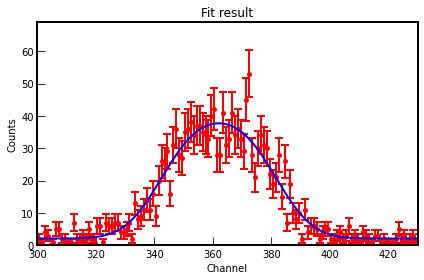

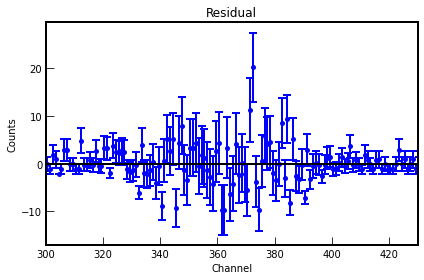

In [407]:
an.plot(path='work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA',xmin=300,xmax=430)

Current path =  work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA
Available parameters : ['weight', 'lnlikelihood', 'a', 'b', 'c', 'y0', 'Dy', 'amp', 'sigma', 'w', 'bg']
Set par_number w to 9


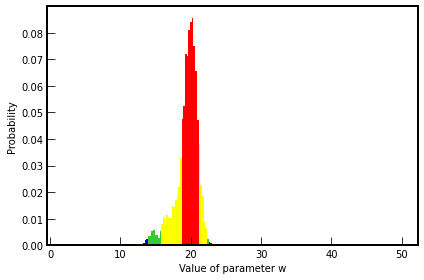

In [411]:
an = nr.Analysis(path='work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA')
%matplotlib inline
#%matplotlib widget
an.histo('w',path='work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA',bins=200)

Set par_number w to 9
Set par_number sigma to 8


/Users/martino/lib/python/nested_res_V4p0.py:1255: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/lib/python/nested_res_V4p0.py:1256: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/lib/python/nested_res_V4p0.py:1257: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/lib/python/nested_res_V4p0.py:1258: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb_rest)


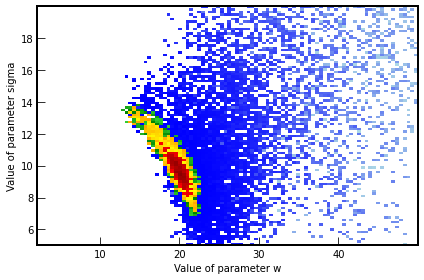

In [412]:
an.histo2D('w','sigma',ymin=5,ymax=20,bins=100,path='work_analysis_2021_06_V2/90/res_He-like_GE_90_1024x1026_ERFPEAK_LA')